<a href="https://colab.research.google.com/github/harshitharavi26/Sketch-Recognition/blob/main/Res_Sketch(80-60-60).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
%matplotlib inline
import cv2
import glob
import os

In [4]:
#predicters = []
#target = []
dir = '/content/drive/My Drive/Try'

def load_dataset(path):
    data = load_files(path)
    #print(data)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    print('loading')
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X,y,target_labels = load_dataset(dir)

loading


In [5]:
no_of_classes = len(np.unique(y))
no_of_classes
from keras.utils import np_utils
y= np_utils.to_categorical(y,no_of_classes)
y[0] 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [ ]:
#def read_image(label,DIR):
 #   
  #  for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
   #     path = os.path.join(DIR,img)
        
    #    _, ftype = os.path.splitext(path)
     #   if ftype == ".png":
       
      #      image = cv2.imread(path,cv2.IMREAD_COLOR)
       #     image = cv2.resize(image, (150,150),interpolation = cv2.INTER_AREA)
        #    predicters.append(np.array(image))
         #   target.append(str(label))
#img=glob.glob(("/content/drive/My Drive/Try/*"))
#j = 0
#for i in img:
 #   read_image(target_labels[j],i)
  #  j=j+1

In [ ]:
#X = np.array(predicters)
#print(X)
#X = X/255
#print(X)

In [ ]:
#encoder = LabelEncoder()
#print(target)
#y = encoder.fit_transform(target)
#change the value of 4 based on number of folders in your folder
#y = to_categorical(y,j)

#print(X.shape)
#print(y.shape)

In [6]:
from sklearn.model_selection import train_test_split
X_train,x_val,Y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
X_train,x_test,Y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
X_train.shape,Y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape
# sum should result in total
print(len(X_train))
print(len(x_val))
print(len(x_test))
print(X_train[0])
print(Y_train[0])
print(x_test[0])
print(y_test[0])

1843
576
461
/content/drive/My Drive/Try/bookshelf/2045.png
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
/content/drive/My Drive/Try/bottle opener/2204.png
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import cv2
default_image_size=tuple((150,150))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Training set shape : ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Validation set shape : ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',X_train[0].shape)

Training set shape :  (1843, 150, 150, 3)
Validation set shape :  (576, 150, 150, 3)
Test set shape :  (461, 150, 150, 3)
1st training image shape  (150, 150, 3)


In [8]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255
X_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [9]:
batch_size = 64
epochs = 20
num_classes = y.shape[1]

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [28]:
from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Model, layers
pre_trained_model = ResNet50(input_shape = (150, 150, 3),include_top=False, weights='imagenet')
#for layer in pre_trained_model.layers:
 # layer.trainable = False
  
pre_trained_model.summary()

#last_layer = pre_trained_model.get_layer('conv5_block3_out')
#print('last layer output shape: ', last_layer.output_shape)
#last_output = last_layer.output
from keras import Model
layer_name = 'conv5_block3_out'
my_model = Model(inputs=pre_trained_model.input,outputs=pre_trained_model.get_layer(layer_name).output)
my_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [32]:
from keras import models         
model = models.Sequential()
model.add(my_model)
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(36,activation='softmax'))
model.layers[5].trainable = False


In [33]:

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
#batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
model_dropout = model.fit_generator(imagegen.flow(X_train,Y_train, batch_size=32),epochs=60,callbacks=[checkpoint,reduce_lr],verbose=2,
                          validation_data=imagegen.flow(x_val, y_val,batch_size=32),shuffle=True,steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/60

Epoch 00001: val_accuracy improved from -inf to 0.56076, saving model to cnn3.hdf5
28/28 - 10s - loss: 1.4907 - accuracy: 0.6797 - val_loss: 1.8576 - val_accuracy: 0.5608
Epoch 2/60

Epoch 00002: val_accuracy did not improve from 0.56076
28/28 - 8s - loss: 1.4189 - accuracy: 0.7237 - val_loss: 1.9417 - val_accuracy: 0.5399
Epoch 3/60

Epoch 00003: val_accuracy did not improve from 0.56076
28/28 - 9s - loss: 1.4359 - accuracy: 0.7199 - val_loss: 1.8721 - val_accuracy: 0.5451
Epoch 4/60

Epoch 00004: val_accuracy did not improve from 0.56076
28/28 - 9s - loss: 1.3928 - accuracy: 0.7310 - val_loss: 1.8671 - val_accuracy: 0.5521
Epoch 5/60

Epoch 00005: val_accuracy did not improve from 0.56076
28/28 - 9s - loss: 1.4189 - accuracy: 0.7112 - val_loss: 1.8615 - val_accuracy: 0.5573
Epoch 6/60

Epoch 00006: val_accuracy did not improve from 0.56076
28/28 - 9s - loss: 1.4067 - accuracy: 0.7305 - val_loss: 1.8470 - val_accuracy: 0.5469
Epoch 7/60

Epoch 00007: val_accuracy did not i

In [54]:
model.load_weights('cnn3.hdf5')

In [56]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test,batch_size=32,verbose=0)
print('\n', 'Test Loss','Test accuracy:', score[0],score[1])
#accuracy !!


 Test Loss Test accuracy: 1.685348629951477 0.6030368804931641


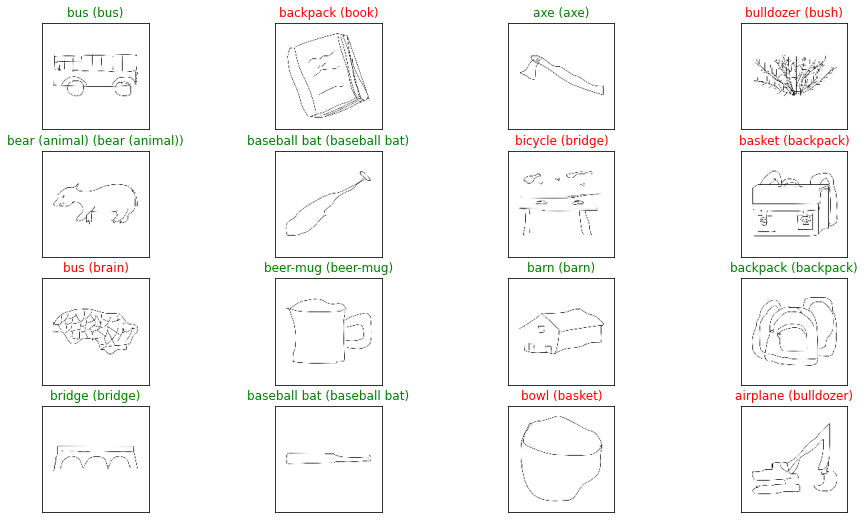

In [58]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [59]:
#y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d Images are identified correctly" %(corr_count))
print("%d Images are identified incorrectly" %(incorr_count))

278 Images are identified correctly
183 Images are identified incorrectly


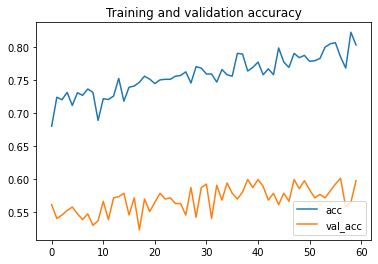

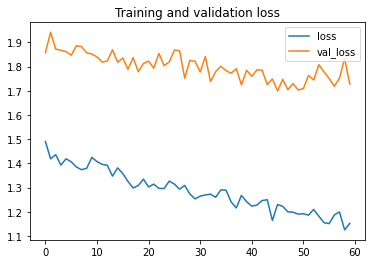

In [60]:
import matplotlib.pyplot as plt
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')  
plt.title('Training and validation loss')

plt.show()

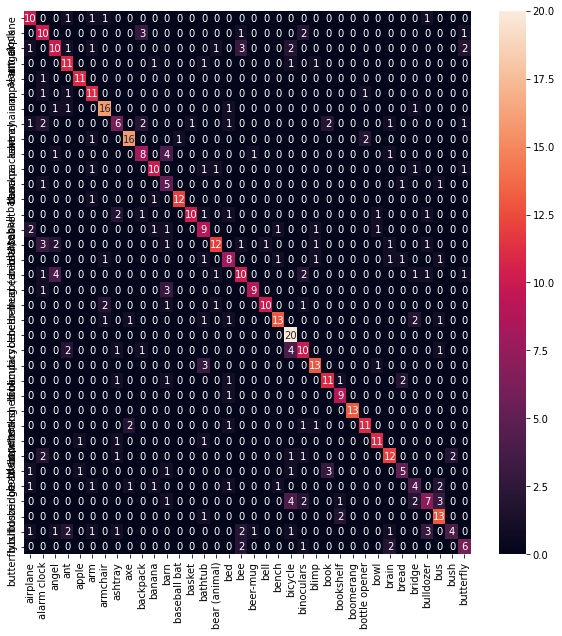

In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)

conf_mat=confusion_matrix(y_true,y_pred_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()

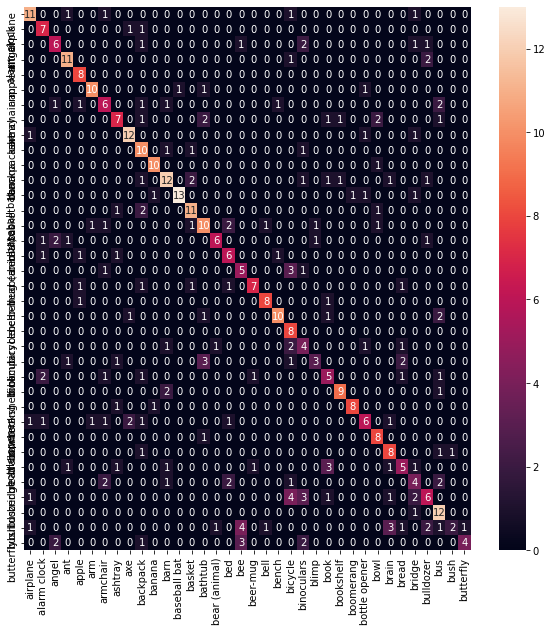

In [62]:
#confusion matrix
y_pred2=model.predict(x_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()